In [155]:
import pandas as pd
import numpy as np
import os

In [156]:
from google.colab import drive

drive.mount('/content/drive')
path = "drive/MyDrive/ColabNotebooks/IndianEarthquake.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
data = pd.read_csv(path,encoding='latin1',skiprows=9)
data.drop(0,axis=0,inplace=True)
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,7,9,10,11,12,13,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME,Unnamed: 5,MAGNITUDE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
5,5.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80.0,NaN,NaN,NaN,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52985,52970.0,2019.0,7,28.0,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.07428,2.32377,2.91501,32.8°N,78.4°E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52986,52971.0,2019.0,7,28.0,10:44:10,16:14:10,3.6,3.6,NaN,3.43659,2.78301,3.33473,25.5°N,90.4°E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52987,52972.0,2019.0,7,28.0,21:25:06,7/29/2019 2:55,4,4,NaN,3.79891,3.24225,3.75446,23.2°N,86.5°E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52988,52973.0,2019.0,7,29.0,3:33:53,9:03:53,4.3,4.3,NaN,4.07065,3.58668,4.06925,32.8°N,76.4°E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


**Modifying the columns**

In [158]:
import re
def do_checks(val,temp,name):
  if ((val==0) or (val == 2)) :
    return float (temp[0:-1])
  elif val == 3:
    return 360 - 1*float (temp[0:-1])
  elif val == 1 :
    if name == 'LAT (N)':
      return 180 - 1*float (temp[0:-1])
    else:
      return float (temp[0:-1])
  return val
def clean_reqcols(val,name):
  checks=['N','S','E','W']
  nums = ['0','1','2','3','4','5','6','7','8','9']
  if type(val) == str:
    temp = re.sub('[^a-zA-Z0-9\.]','',val.replace('?','').replace(' ','').replace(',','.'))
    last = temp[-1]
    if (last in checks):
      return do_checks(checks.index(last),temp,name)
    else:
      return float (temp)
  
  return float (val)


useful = data[['DEPTH (km)','LAT (N)', 'LONG (E)','MAGNITUDE']]
# useful
useful['LAT (N)'] = useful['LAT (N)'].apply(clean_reqcols,args = ('LAT (N)',))
useful['LONG (E)'] = useful['LONG (E)'].apply(clean_reqcols,args=('LONG (E)',))

useful.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DEPTH (km),LAT (N),LONG (E),MAGNITUDE
52985,10.0,32.8,78.4,3.2
52986,70.0,25.5,90.4,3.6
52987,22.0,23.2,86.5,4
52988,20.0,32.8,76.4,4.3
52989,10.0,20.0,72.8,3


In [159]:
useful['MAGNITUDE'].describe()

count     40935
unique      327
top         4.3
freq       2961
Name: MAGNITUDE, dtype: object

## **Cleaning the data**

In [160]:
def cleanData(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64) 
print(useful.shape)
useful = cleanData(useful)
print(useful.shape)


(52989, 4)
(40107, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
print(useful.shape)
useful.reset_index(drop=True, inplace=True)
useful

(40107, 4)


,DEPTH (km),LAT (N),LONG (E),MAGNITUDE
0,0.0,71.0,24.00,7.5000
1,0.0,71.0,24.00,7.5000
2,0.0,72.9,33.72,7.5000
3,80.0,26.0,97.00,6.1397
4,0.0,69.5,37.10,7.0000
...,...,...,...,...
40102,10.0,32.8,78.40,3.2000
40103,70.0,25.5,90.40,3.6000
40104,22.0,23.2,86.50,4.0000
40105,20.0,32.8,76.40,4.3000


In [162]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X = useful [['DEPTH (km)','LAT (N)', 'LONG (E)']]

Y = preprocessing.LabelEncoder().fit_transform(useful ['MAGNITUDE'])
Y = Y.astype('float')
Y[Y<4.5] = 0
Y[Y>=4.5] = 1
print(Y)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.3,random_state=1)
print(np.any(np.isnan(train_Y)))

[1. 1. 1. ... 1. 1. 1.]
False


## **KNN**

In [163]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,roc_auc_score,auc,roc_curve
import matplotlib.pyplot as plt

rscore = []
for i in range(1,8):
  knN = KNN(n_neighbors=i)
  knN.fit(train_X,train_Y)
  rauc_score = roc_auc_score(test_Y, knN.predict(test_X))
  rscore.append(rauc_score)


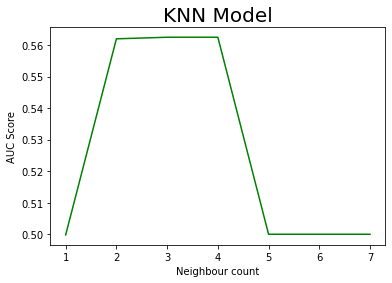

In [164]:
plt.plot(list(range(1,8)),rscore,c='g')
plt.title('KNN Model',fontSize =20)
plt.xlabel('Neighbour count')
plt.ylabel('AUC Score')
plt.show()
  

In [165]:
fpr_array=[]
tpr_array=[]
roc_auc_array=[]
neighbous=[]
for i in range(1,5,1):
  knn = KNN(n_neighbors=i)
  neighbous.append(i)
  knn.fit(train_X, train_Y)
  y_pred = knn.predict(test_X)
  fpr, tpr, _ = roc_curve(test_Y, y_pred)
  fpr_array.append(fpr)
  tpr_array.append(tpr)
  roc_auc = auc(fpr, tpr)
  roc_auc_array.append(roc_auc)




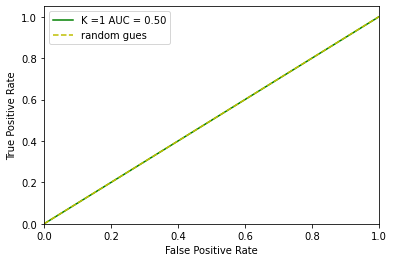

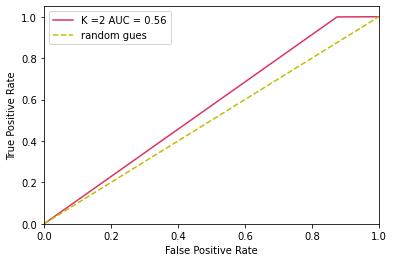

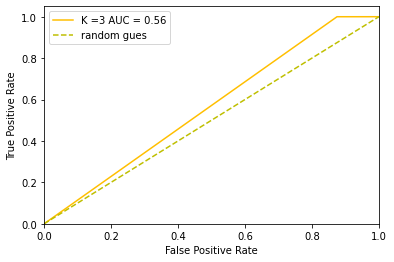

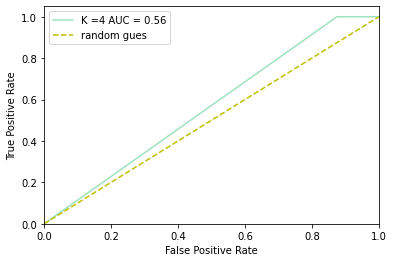

In [166]:
colorSet=['g','#DE3163','#FFBF00','#9FE2BF','#6495ED','#CCCCFF','#CD5C5C','#8e44ad'
,'#273746','#2ecc71','#839192']
plt.figure()
for i in range(len(fpr_array)):
  plt.plot(fpr_array[i], tpr_array[i], label = 'K =%d AUC = %0.2f' %(neighbous[i],roc_auc_array[i]), c = colorSet[i%len(colorSet)])
  plt.plot([0, 1], [0, 1], 'k--',c = 'y',label = 'random gues')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='upper left')
  plt.show()

# **Decision Tree**

In [167]:
from sklearn.tree import DecisionTreeRegressor as DTR

rscore = []
dpth = []
for i in range(2,40):
  dt = DTR(max_leaf_nodes=i, random_state=1)
  dt.fit(train_X,train_Y)
  rscore.append(roc_auc_score(test_Y, dt.predict(test_X)))
  dpth.append(i)


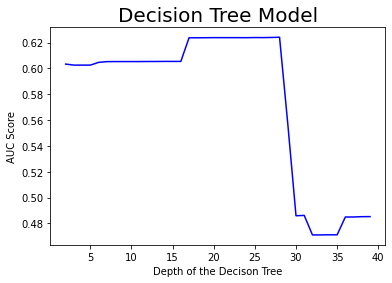

In [168]:
plt.plot(dpth,rscore,c='b')
plt.title('Decision Tree Model',fontSize =20)
plt.xlabel('Depth of the Decison Tree')
plt.ylabel('AUC Score')
plt.show()

In [169]:
fpr_array=[]
tpr_array=[]
roc_auc_array=[]
depth=[]
for i in range(2,39,8):
  dt = DTR(max_leaf_nodes=i, random_state=1)
  depth.append(i)
  dt.fit(train_X, train_Y)
  y_pred = dt.predict(test_X)
  fpr, tpr, _ = roc_curve(test_Y, y_pred)
  fpr_array.append(fpr)
  tpr_array.append(tpr)
  roc_auc = auc(fpr, tpr)
  roc_auc_array.append(roc_auc)

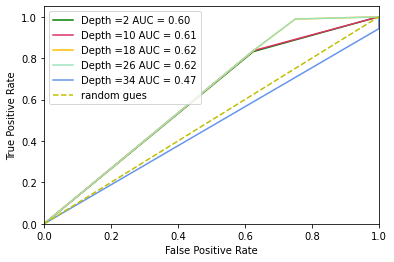

In [170]:
plt.figure()
for i in range(len(fpr_array)):
  plt.plot(fpr_array[i], tpr_array[i], label = 'Depth =%d AUC = %0.2f' %(depth[i],roc_auc_array[i]), c = colorSet[i%len(colorSet)])
plt.plot([0, 1], [0, 1], 'k--',c = 'y',label = 'random gues')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()

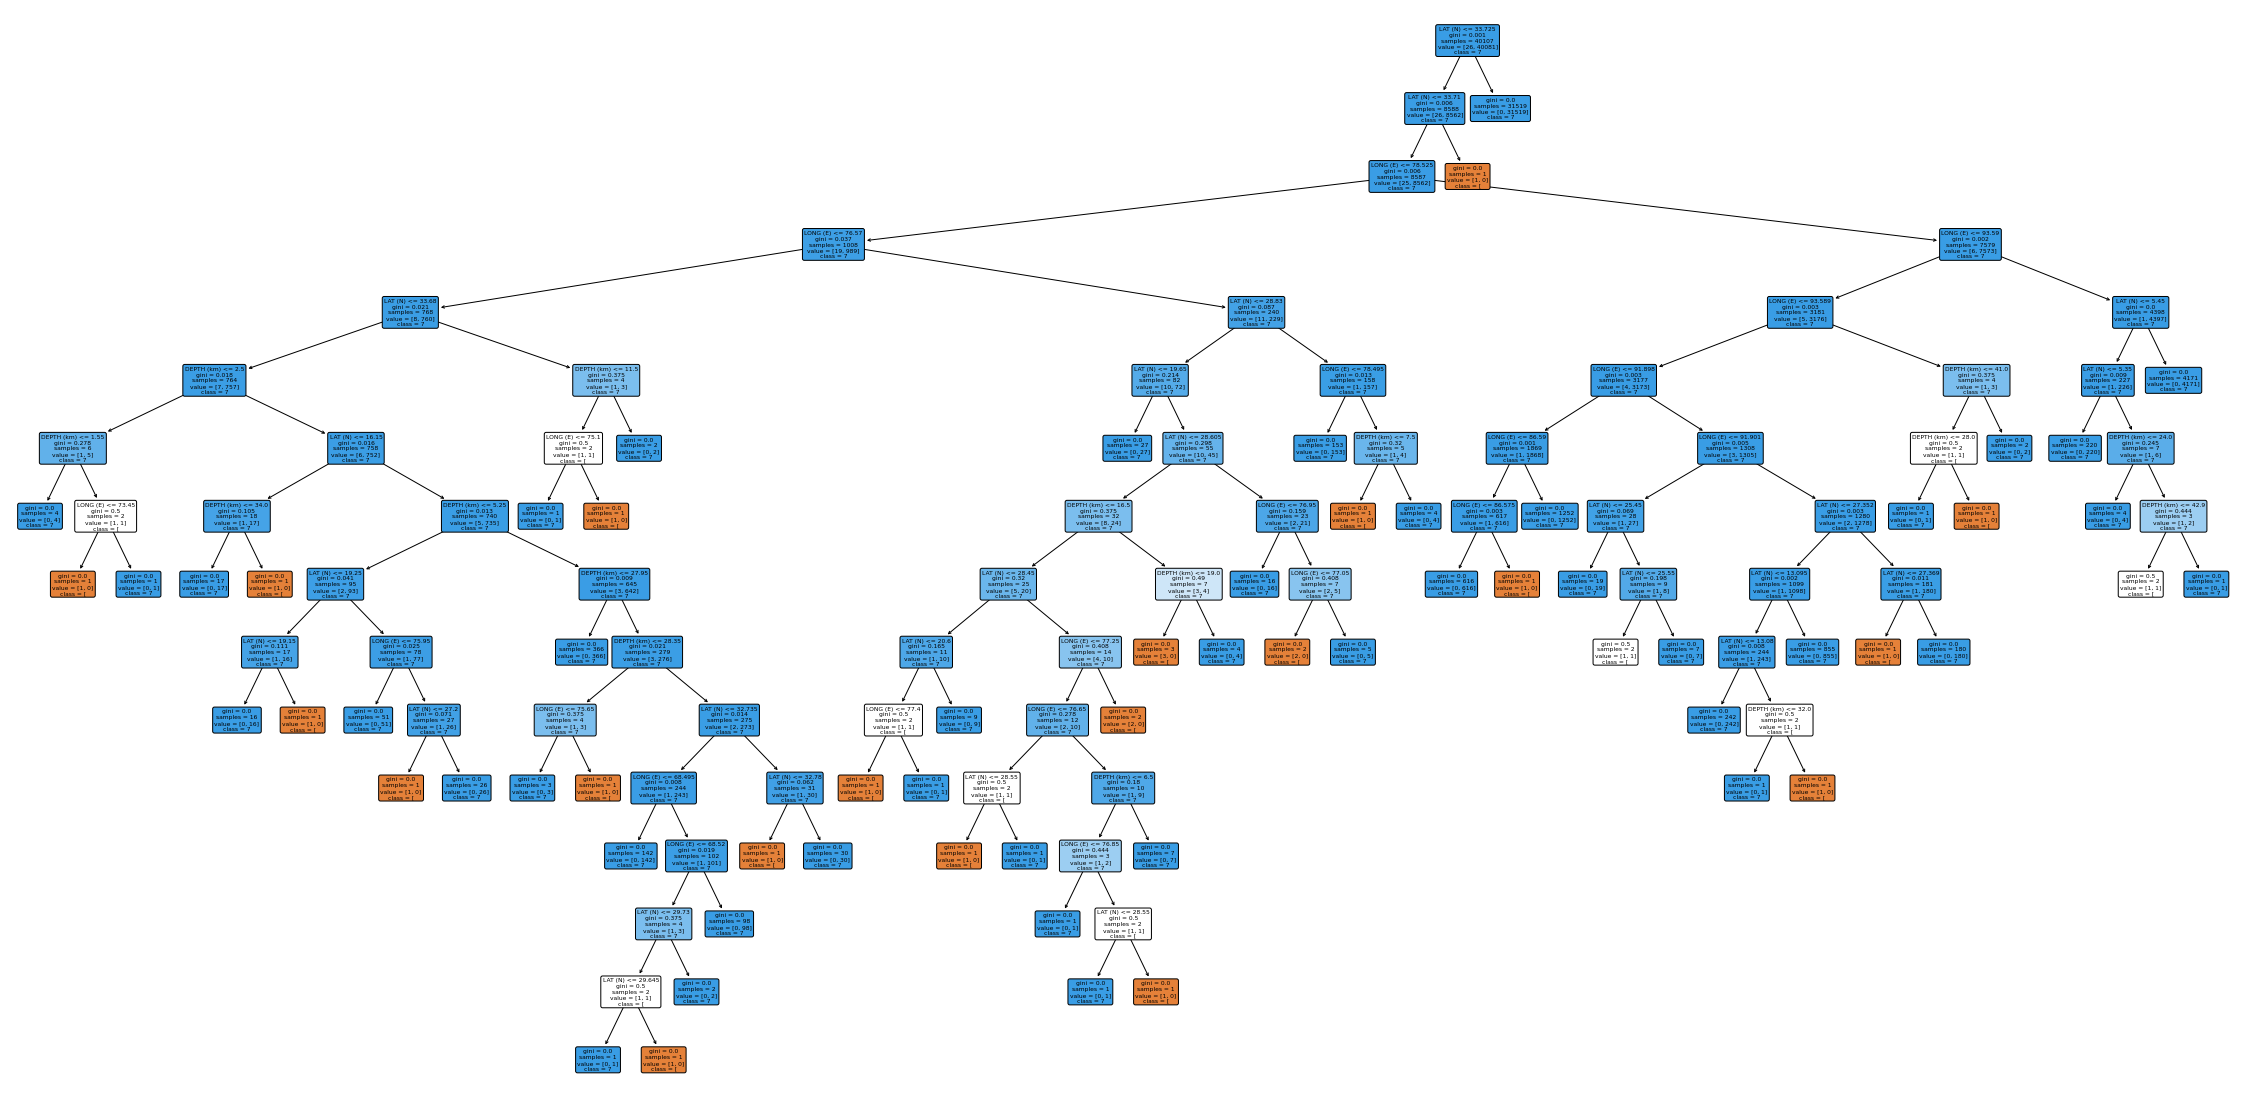

<Figure size 432x288 with 0 Axes>

In [171]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DT
model = DT()
model.fit(X,Y)
# export_graphviz( model,out_file="tree.dot", feature_names=, class_names=str(useful['MAGNITUDE'].unique()), rounded=True,filled=True)
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = ['DEPTH (km)','LAT (N)', 'LONG (E)'], class_names=str(useful['MAGNITUDE'].unique()),
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('DT.png')

In [172]:
pip install scikit-plot

# **Ensemble Learning**

In [173]:
import scikitplot as skplt# Because the algorithm is so slow, we use just 4 different trees to see the outcomes.
from sklearn.ensemble import AdaBoostClassifier
fpr_array=[]
tpr_array=[]
roc_auc_array=[]
esti = []
rscore = []
for i in range(10,1001,100):
  model = AdaBoostClassifier(n_estimators=i, random_state=7)  
  model = model.fit(train_X, train_Y)
  y_pred = model.predict(test_X)
  esti.append(i)
  rscore.append(roc_auc_score(test_Y, model.predict(test_X)))
  fpr, tpr, _ = roc_curve(test_Y, y_pred)
  fpr_array.append(fpr)
  tpr_array.append(tpr)
  roc_auc = auc(fpr, tpr)
  roc_auc_array.append(roc_auc)


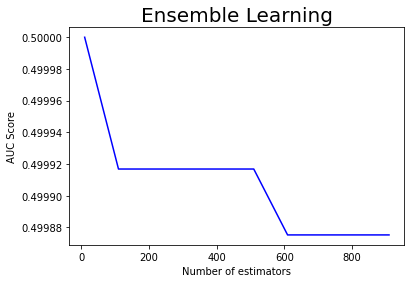

In [174]:
plt.plot(esti,rscore,c='b')
plt.title('Ensemble Learning',fontSize =20)
plt.xlabel('Number of estimators')
plt.ylabel('AUC Score')
plt.show()

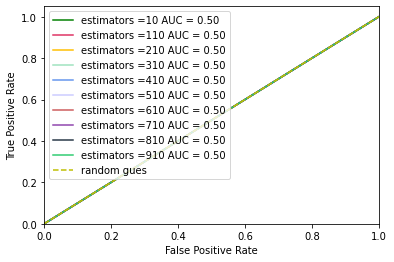

In [175]:
plt.figure()
for i in range(len(esti)):
  plt.plot(fpr_array[i], tpr_array[i], label = 'estimators =%d AUC = %0.2f' %(esti[i],roc_auc_array[i]), c = colorSet[i%len(colorSet)])
plt.plot([0, 1], [0, 1], 'k--',c = 'y',label = 'random gues')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.show()